In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
df=pd.read_csv('/content/twitter_validation (1).csv',header=None,encoding='ISO-8859-1')
df.columns=['id','media','target','text']
df

,id,media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [6]:
df.isna().sum()

,0
id,0
media,0
target,0
text,0


In [7]:
df.dtypes

,0
id,int64
media,object
target,object
text,object


<Axes: xlabel='target'>

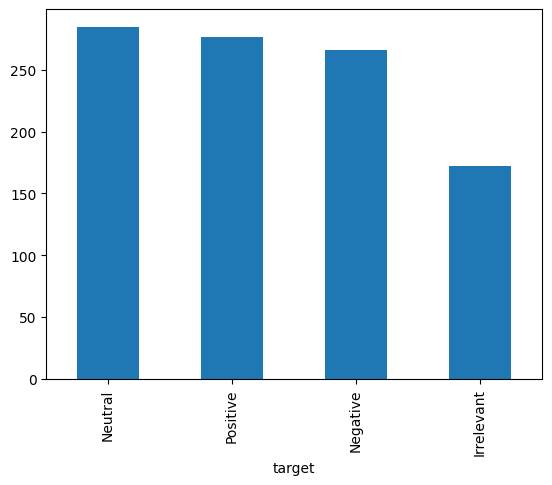

In [8]:
df['target'].value_counts().plot(kind='bar')


In [9]:
df.drop(['id','media'],axis=1,inplace=True)
df

,target,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so itâs time to drink wine n pl...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
for i in df.index:
  if df.loc[i,'target']=='Irrelevant':
    df.drop(i,inplace=True)
df
# or
# df.drop(df[df['target']=='Irrelevant'].index,inplace=True)
# df
df.reset_index(drop=True,inplace=True)
df


,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [11]:
dic={'Neutral':0,'Negative':-1,'Positive':1}
df['target']=df['target'].map(dic)
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [12]:
df.dtypes

,0
target,int64
text,object


In [13]:
tweet=df['text']
# or
# tweet=df.text
tweet

,text
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,"CSGO matchmaking is so full of closet hacking,..."
3,Now the President is slapping Americans in the...
4,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...
823,Please explain how this is possible! How can t...
824,Good on Sony. As much as I want to see the new...
825,Today sucked so itâs time to drink wine n pl...
826,Bought a fraction of Microsoft today. Small wins.


In [14]:
# Tokenization
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
# tweet=tweet.apply(lambda x:tk.tokenize(x))
tweet=tweet.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
tweet.dtypes


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


dtype('O')

In [15]:
# removing special characters
import re
tweet=tweet.str.replace('[^a-zA-Z0-9]',' ',regex=True)
tweet

,text
0,BBC News Amazon boss Jeff Bezos rejects clai...
1,Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi EAHelp I ve had Madeleine McCann in m...
...,...
823,Please explain how this is possible How can ...
824,Good on Sony As much as I want to see the ne...
825,Today sucked so it s time to drink wine n...
826,Bought a fraction of Microsoft today Small w...


In [16]:
# to collect meaningful words (collect word length  above 3)

from nltk.tokenize import word_tokenize
# tweet=tweet.apply(lambda x:word_tokenize(x))
# tweet=tweet.apply(lambda x:' '.join(x))
tweet=tweet.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3]))
tweet

,text
0,BBC News Amazon boss Jeff Bezos rejects claims...
1,Microsoft Why pay for WORD when functions poor...
2,CSGO matchmaking full closet hacking truly awf...
3,Now the President slapping Americans the face ...
4,EAHelp had Madeleine McCann cellar for the pas...
...,...
823,Please explain how this possible How can they ...
824,Good Sony much want see the new PS5 what going...
825,Today sucked time drink wine play borderlands ...
826,Bought fraction Microsoft today Small wins


In [17]:
# stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweet=tweet.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweet


,text
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi pay for word when function poor ...
2,csgo matchmak full closet hack truli aw game
3,now the presid slap american the face that rea...
4,eahelp had madelein mccann cellar for the past...
...,...
823,pleas explain how this possibl how can they le...
824,good soni much want see the new ps5 what go ri...
825,today suck time drink wine play borderland unt...
826,bought fraction microsoft today small win


In [18]:
# removal of stop words
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
tweet=tweet.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop_words]).apply(lambda x:' '.join(x))
tweet

,text
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi pay word function poor samsungus...
2,csgo matchmak full closet hack truli aw game
3,presid slap american face realli commit unlaw ...
4,eahelp madelein mccann cellar past year littl ...
...,...
823,pleas explain possibl let compani overcharg sc...
824,good soni much want see new ps5 go right much ...
825,today suck time drink wine play borderland sun...
826,bought fraction microsoft today small win


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
data=vector.fit_transform(tweet)
data

<828x3763 sparse matrix of type '<class 'numpy.float64'>'
	with 10461 stored elements in Compressed Sparse Row format>

In [20]:
print(data)

  (0, 515)	0.49155204783978756
  (0, 2267)	0.38864111655856126
  (0, 353)	0.1515362387424402
  (0, 610)	0.22681557001542715
  (0, 1813)	0.24577602391989378
  (0, 545)	0.2608257828483461
  (0, 2741)	0.2608257828483461
  (0, 785)	0.21432663830218204
  (0, 838)	0.17354914655342313
  (0, 286)	0.22681557001542715
  (0, 1976)	0.13277165480466424
  (0, 1108)	0.23509805002803952
  (0, 982)	0.2608257828483461
  (0, 668)	0.2608257828483461
  (1, 2135)	0.24555654927912696
  (1, 3619)	0.26216072802580975
  (1, 2442)	0.3126902562590763
  (1, 3659)	0.36557591217188057
  (1, 1383)	0.4055823664694651
  (1, 2538)	0.3821800909185634
  (1, 2871)	0.4055823664694651
  (1, 775)	0.4055823664694651
  (2, 934)	0.3041178383627944
  (2, 2085)	0.3963165794888645
  (2, 1380)	0.3790982275064499
  :	:
  (825, 3363)	0.2560582225152133
  (825, 3373)	0.3395996844494918
  (825, 826)	0.2506921490798916
  (825, 1587)	0.2806965020161681
  (825, 3633)	0.35502404277063115
  (825, 1100)	0.37676345482672335
  (825, 3215)	0.376

In [21]:
y=df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
gnb=BernoulliNB()
lst=[knn,svc,rfc,dtc,gnb]
for i in lst:
  print(f'Model is {i}')
  print("*************")
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(f'Accuracy is {accuracy_score(y_test,y_pred)}')
  print(f'classification report is {classification_report(y_test,y_pred)}')

Model is KNeighborsClassifier()
*************
Accuracy is 0.4759036144578313
classification report is               precision    recall  f1-score   support

          -1       0.42      0.82      0.56        55
           0       0.50      0.35      0.41        46
           1       0.64      0.28      0.39        65

    accuracy                           0.48       166
   macro avg       0.52      0.48      0.45       166
weighted avg       0.53      0.48      0.45       166

Model is SVC()
*************
Accuracy is 0.5240963855421686
classification report is               precision    recall  f1-score   support

          -1       0.73      0.40      0.52        55
           0       0.37      0.74      0.49        46
           1       0.70      0.48      0.57        65

    accuracy                           0.52       166
   macro avg       0.60      0.54      0.53       166
weighted avg       0.62      0.52      0.53       166

Model is RandomForestClassifier()
*************
Acc